# Cab Company Analysis

## LISUM 33 - Data Glacier

### By:  Keith D. Smith

### Import Packages

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

### Import Data

In [29]:
import pandas as pd

# File paths
cab_data_path = "Cab_Data.csv"
city_data_path = "City.csv"
customer_data_path = "Customer_ID.csv"
transaction_data_path = "Transaction_ID.csv"

# Importing datasets into dataframes
cab_data = pd.read_csv(cab_data_path)
city_data = pd.read_csv(city_data_path)
customer_data = pd.read_csv(customer_data_path)
transaction_data = pd.read_csv(transaction_data_path)


## EDA

<b> Data File Information <b>

In [30]:
# Getting the total number of observations and features for each dataframe
cab_data_obs, cab_data_features = cab_data.shape
city_data_obs, city_data_features = city_data.shape
customer_data_obs, customer_data_features = customer_data.shape
transaction_data_obs, transaction_data_features = transaction_data.shape

# Printing the results
print("Cab Data:")
print("Total Observations:", cab_data_obs)
print("Total Features:", cab_data_features)

print("\nCity Data:")
print("Total Observations:", city_data_obs)
print("Total Features:", city_data_features)

print("\nCustomer Data:")
print("Total Observations:", customer_data_obs)
print("Total Features:", customer_data_features)

print("\nTransaction Data:")
print("Total Observations:", transaction_data_obs)
print("Total Features:", transaction_data_features)

Cab Data:
Total Observations: 359392
Total Features: 7

City Data:
Total Observations: 20
Total Features: 3

Customer Data:
Total Observations: 49171
Total Features: 4

Transaction Data:
Total Observations: 440098
Total Features: 3


 <b> Feature Names <b>

In [31]:
# Getting the names of features for each dataframe
cab_data_features = cab_data.columns.tolist()
city_data_features = city_data.columns.tolist()
customer_data_features = customer_data.columns.tolist()
transaction_data_features = transaction_data.columns.tolist()

# Printing the names of features for each dataframe
print("Cab Data Features:")
print(cab_data_features)

print("\nCity Data Features:")
print(city_data_features)

print("\nCustomer Data Features:")
print(customer_data_features)

print("\nTransaction Data Features:")
print(transaction_data_features)

Cab Data Features:
['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip']

City Data Features:
['City', 'Population', 'Users']

Customer Data Features:
['Customer ID', 'Gender', 'Age', 'Income (USD/Month)']

Transaction Data Features:
['Transaction ID', 'Customer ID', 'Payment_Mode']


<b> Head of Data Sets <b>

In [32]:
# Displaying the head of each dataset
print("Cab Data:")
print(cab_data.head())

print("\nCity Data:")
print(city_data.head())

print("\nCustomer Data:")
print(customer_data.head())

print("\nTransaction Data:")
print(transaction_data.head())

Cab Data:
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  

City Data:
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 

Customer Data:
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28

<b> Merge Data Sets <b>

In [33]:
#Merge cab_data with city_data based on "City"
merged_data = pd.merge(cab_data, city_data, on="City")

# Displaying the head of the merged dataset
print("Head of Merged Data:")
print(merged_data.head())

# Displaying the tail of the merged dataset
print("\nTail of Merged Data:")
print(merged_data.tail())

# Displaying the shape of the merged dataset
print("\nShape of Merged Data:")
print(merged_data.shape)

Head of Merged Data:
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip Population     Users  
0         370.95       313.635   814,885    24,701   
1         358.52       334.854   814,885    24,701   
2         125.20        97.632   814,885    24,701   
3         377.40       351.602   814,885    24,701   
4         114.62        97.776   814,885    24,701   

Tail of Merged Data:
        Transaction ID  Date of Travel     Company           City  \
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASH

In [34]:
#Merge the transaction_data to the merged_data by transaction_id
merged_data = pd.merge(merged_data, transaction_data, on="Transaction ID")

# Displaying the head of the merged dataset
print("Head of Merged Data:")
print(merged_data.head())

# Displaying the tail of the merged dataset
print("\nTail of Merged Data:")
print(merged_data.tail())

# Displaying the shape of the merged dataset
print("\nShape of Merged Data:")
print(merged_data.shape)

Head of Merged Data:
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip Population     Users  Customer ID Payment_Mode  
0         370.95       313.635   814,885    24,701         29290         Card  
1         358.52       334.854   814,885    24,701         27703         Card  
2         125.20        97.632   814,885    24,701         28712         Cash  
3         377.40       351.602   814,885    24,701         28020         Cash  
4         114.62        97.776   814,885    24,701         27182         Card  

Tail of Merged Data:
        Transaction ID  Date of Travel

In [35]:
# Merge merged_data with customer_data based on the "Customer_ID" feature
merged_data = pd.merge(merged_data, customer_data, on="Customer ID")

# Displaying the head of the merged dataset
print("Head of Merged Data:")
print(merged_data.head())

# Displaying the tail of the merged dataset
print("\nTail of Merged Data:")
print(merged_data.tail())

# Displaying the shape of the merged dataset
print("\nShape of Merged Data:")
print(merged_data.shape)

Head of Merged Data:
   Transaction ID  Date of Travel     Company        City  KM Travelled  \
0        10000011           42377    Pink Cab  ATLANTA GA         30.45   
1        10351127           43302  Yellow Cab  ATLANTA GA         26.19   
2        10412921           43427  Yellow Cab  ATLANTA GA         42.55   
3        10000012           42375    Pink Cab  ATLANTA GA         28.62   
4        10320494           43211  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip Population     Users  Customer ID Payment_Mode  \
0         370.95      313.6350   814,885    24,701         29290         Card   
1         598.70      317.4228   814,885    24,701         29290         Cash   
2         792.05      597.4020   814,885    24,701         29290         Card   
3         358.52      334.8540   814,885    24,701         27703         Card   
4         721.10      467.1192   814,885    24,701         27703         Card   

  Gender  Age  Income (USD/Month)  
0   M

In [36]:
#Convert Date from Excel Date Format to Standard Date Format
merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'] - 2, unit = 'D', origin = '1899-12-30')
merged_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,2018-07-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,2018-11-21,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,2016-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,2018-04-19,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


<b> Data Integrity Check

In [37]:
# Check for missing data in the merged dataset
missing_data = merged_data.isnull().sum()

# Displaying columns with missing data
print("Columns with Missing Data:")
print(missing_data[missing_data > 0])

Columns with Missing Data:
Series([], dtype: int64)


<b> Univariate Analysis <b>

In [38]:
# Selecting numerical columns excluding "Transaction ID" and "Customer ID"
numerical_columns = merged_data.select_dtypes(include=['number']).drop(columns=['Transaction ID', 'Customer ID'])

# Descriptive statistics of numerical data
numerical_stats = numerical_columns.describe()

# Displaying descriptive statistics
print("Descriptive Statistics of Numerical Data (Excluding 'Transaction ID' and 'Customer_ID'):")
print(numerical_stats)

Descriptive Statistics of Numerical Data (Excluding 'Transaction ID' and 'Customer_ID'):
        KM Travelled  Price Charged   Cost of Trip            Age  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean       22.567254     423.443311     286.190113      35.336705   
std        12.233526     274.378911     157.993661      12.594234   
min         1.900000      15.600000      19.000000      18.000000   
25%        12.000000     206.437500     151.200000      25.000000   
50%        22.440000     386.360000     282.480000      33.000000   
75%        32.960000     583.660000     413.683200      42.000000   
max        48.000000    2048.030000     691.200000      65.000000   

       Income (USD/Month)  
count       359392.000000  
mean         15048.822937  
std           7969.409482  
min           2000.000000  
25%           8424.000000  
50%          14685.000000  
75%          21035.000000  
max          35000.000000  


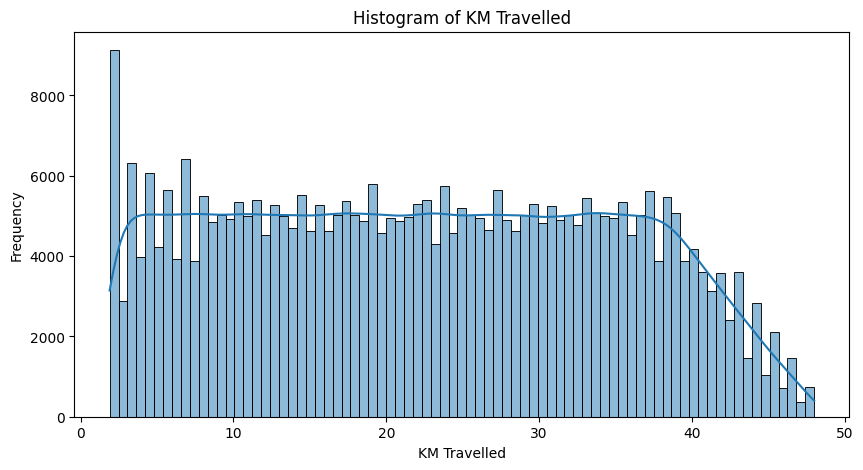

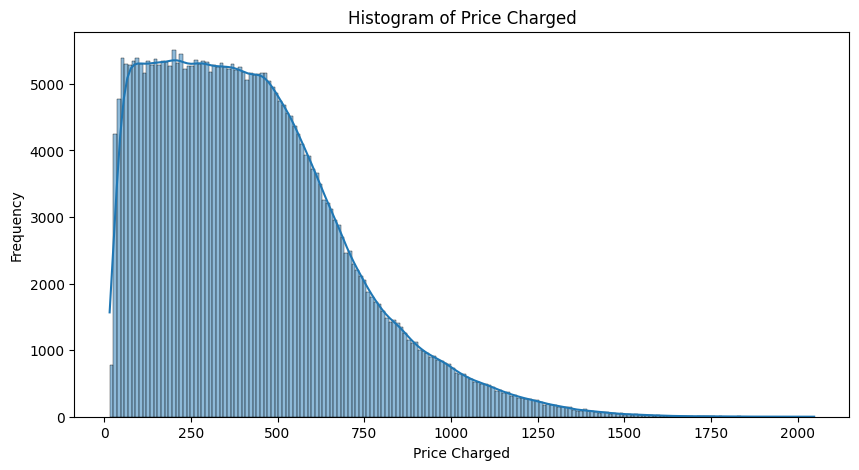

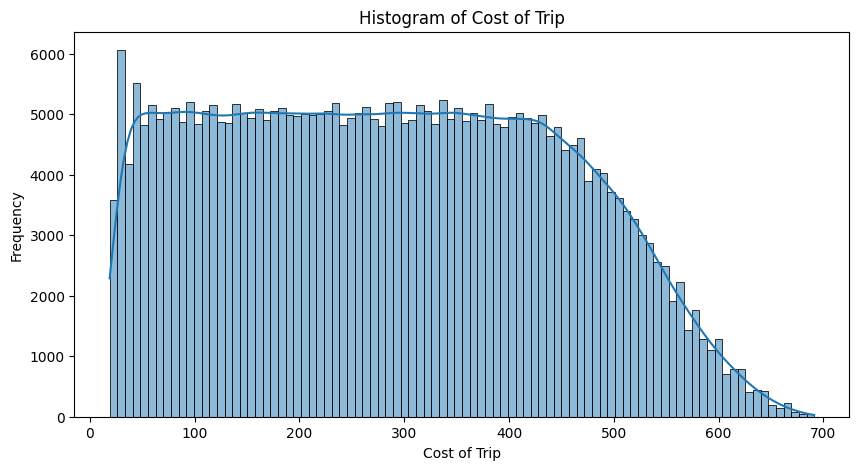

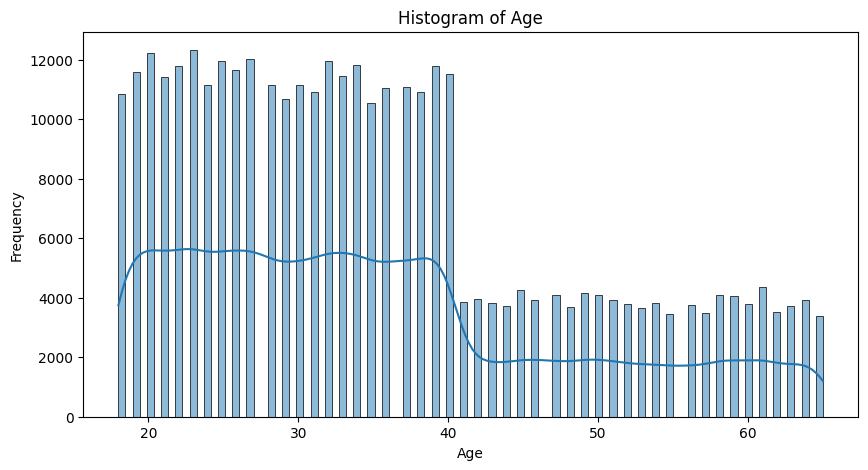

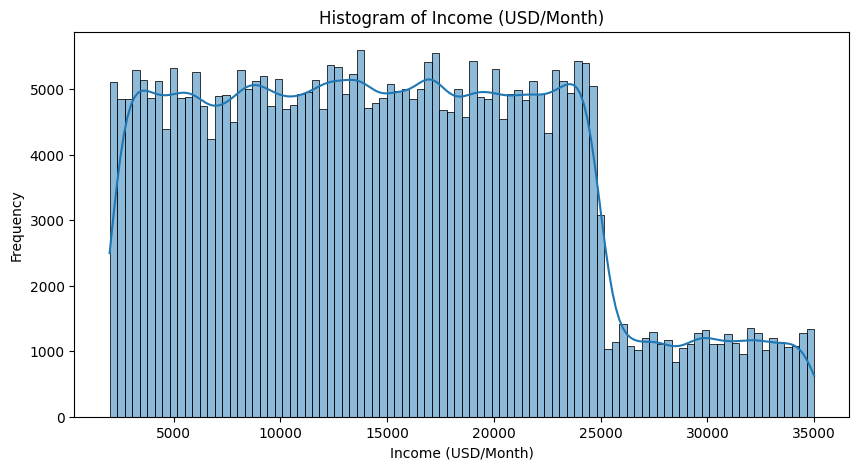

In [39]:
# Plotting histograms
for column in numerical_columns.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(numerical_columns[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

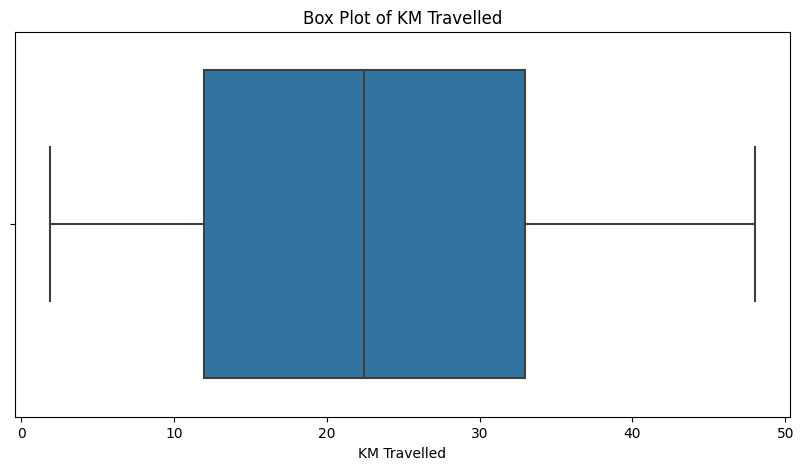

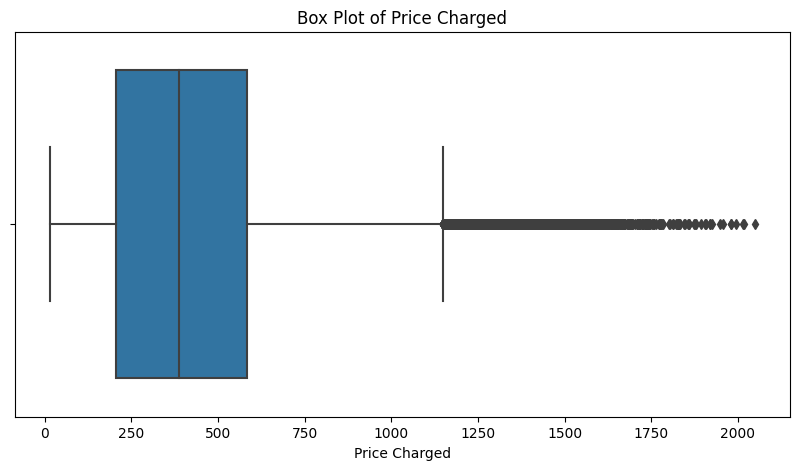

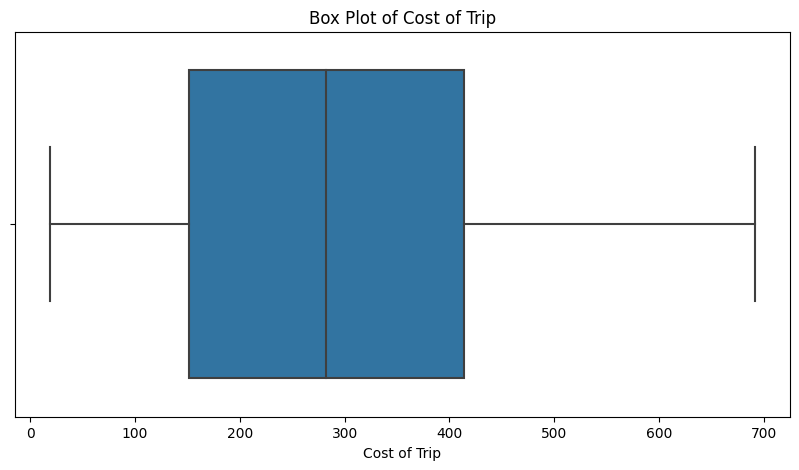

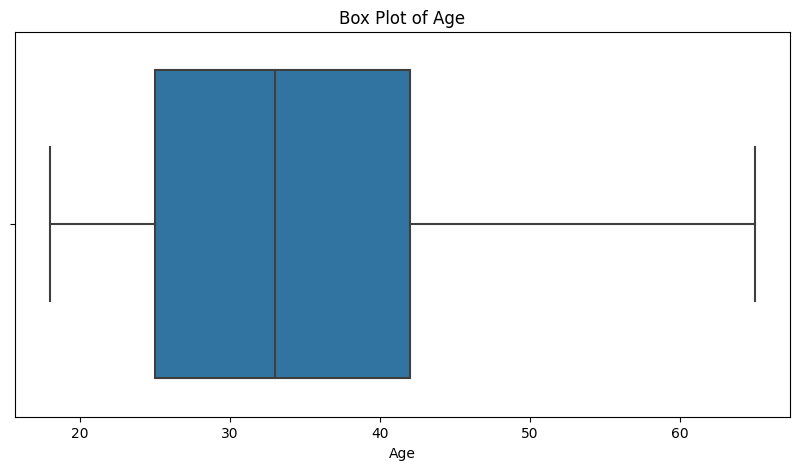

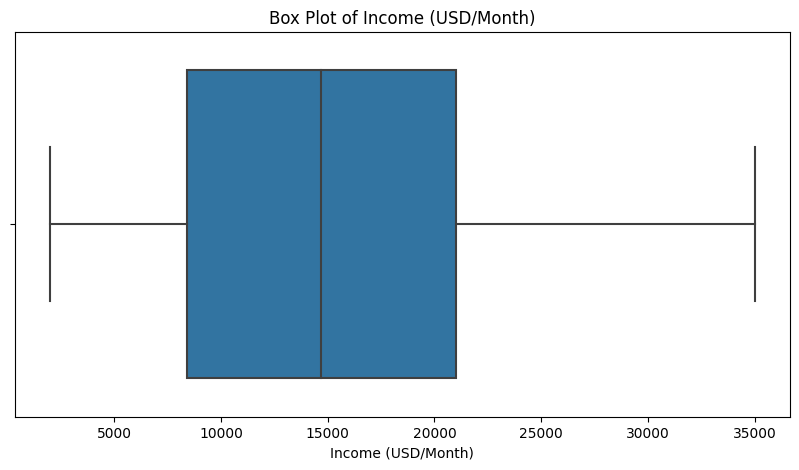

In [40]:
# Plotting box plots
for column in numerical_columns.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=numerical_columns[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [41]:
# Select only categorical columns
categorical_columns = merged_data.select_dtypes(include=['object', 'category']).columns

# Frequency count for all categorical columns
for column in categorical_columns:
    print(f"Frequency count for {column}:")
    print(merged_data[column].value_counts())
    print("\n")

Frequency count for Company:
Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64


Frequency count for City:
City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64


Frequency count for Population:
Population
 8,405,837     99885
 1,955,130     56625
 1,595,037     48033
 418,859       43737
 248,968       29692
 959,307       20488
 1,177,609      8519
 671,238        7997
 814,885        7557
 942,908        7017
 1,339,155      6454
 698,371        4896
 1,030,185      3982
 754,233        3825
 327,225        3010
 545,776        2367

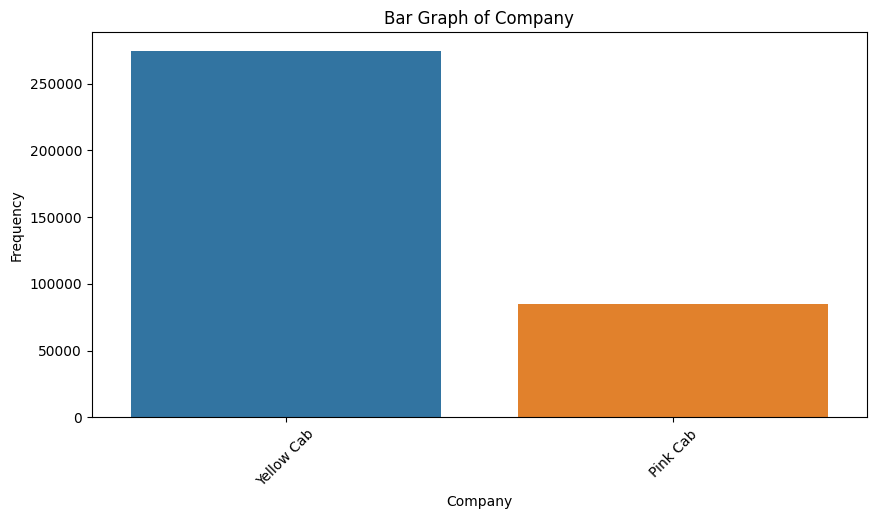

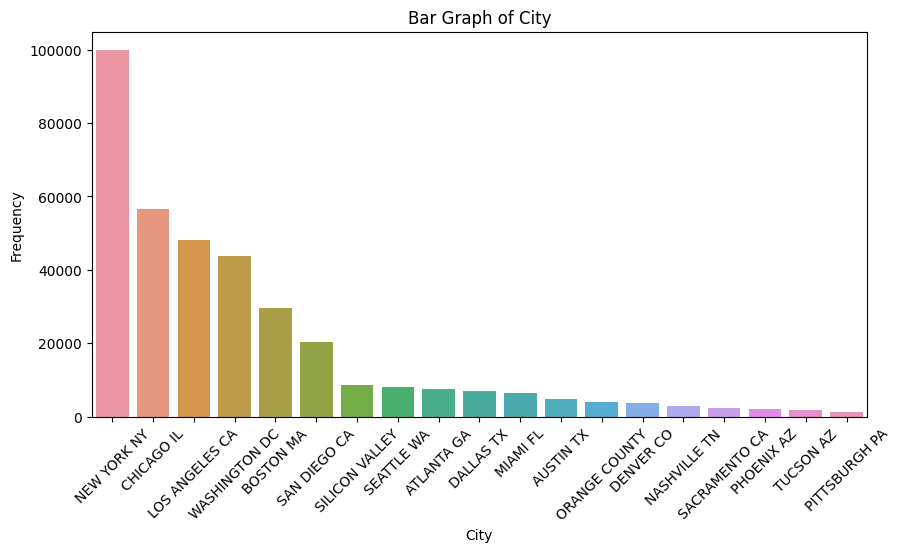

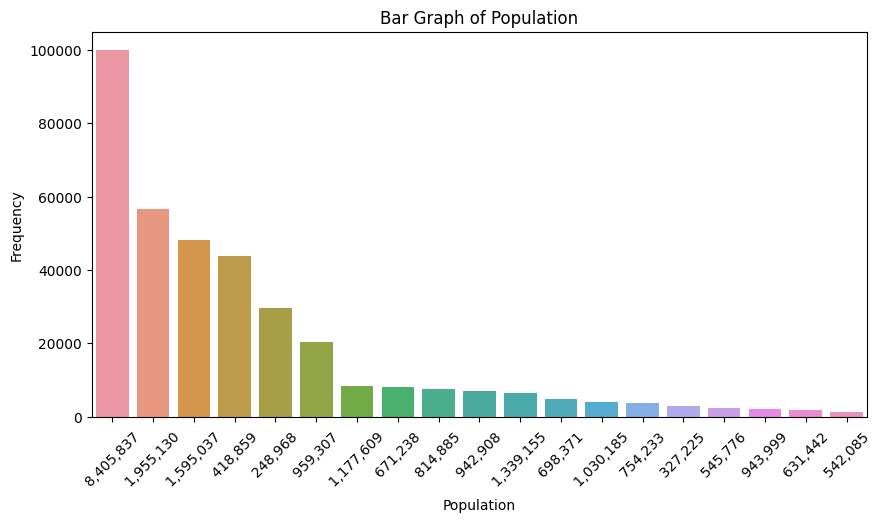

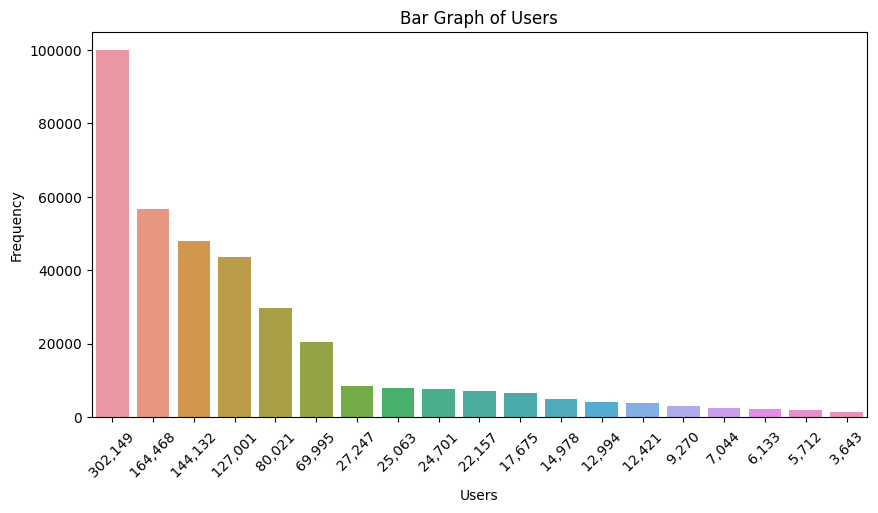

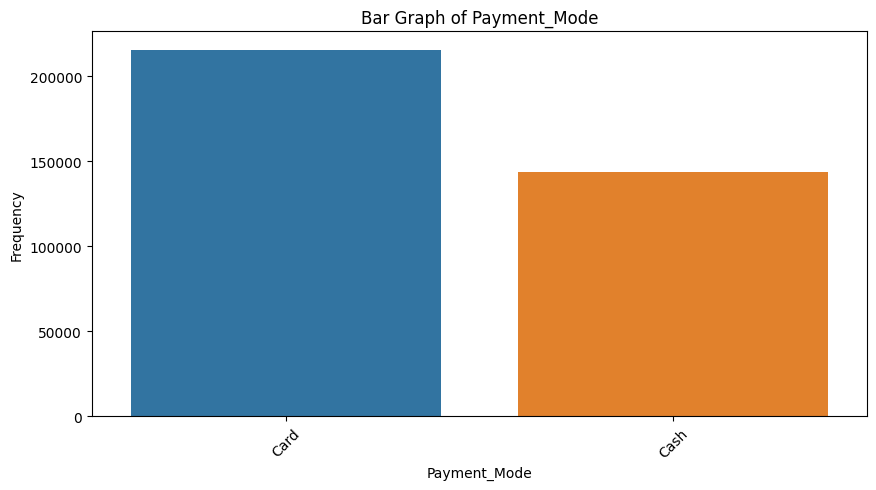

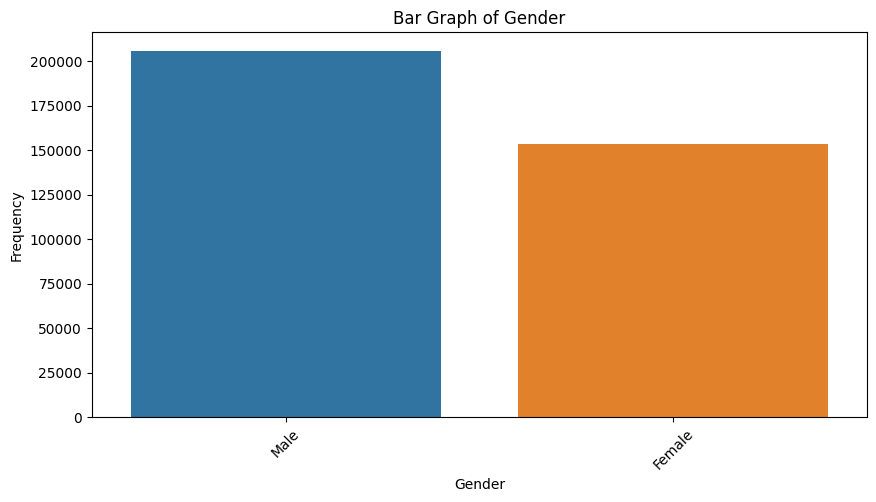

In [42]:
# Plotting bar graphs for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=merged_data, x=column, order=merged_data[column].value_counts().index)
    plt.title(f'Bar Graph of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

<b> Time Series Plot <b>

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

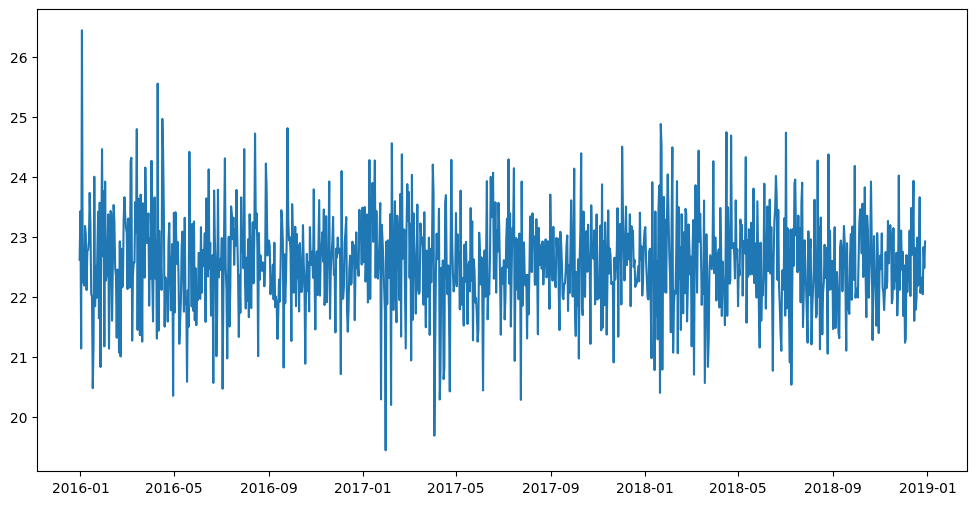

In [49]:
# Ensure that the 'KM Travelled' column is numeric
merged_data['KM Travelled'] = pd.to_numeric(merged_data['KM Travelled'], errors='coerce')

# Plotting time series for 'Date of Travel' with respect to 'KM Travelled'
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='Date of Travel', y='KM Travelled')
plt.title('Time Series of KM Travelled over Date of Travel')
plt.xlabel('Date of Travel')
plt.ylabel('KM Travelled')
plt.xticks(rotation=45)
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

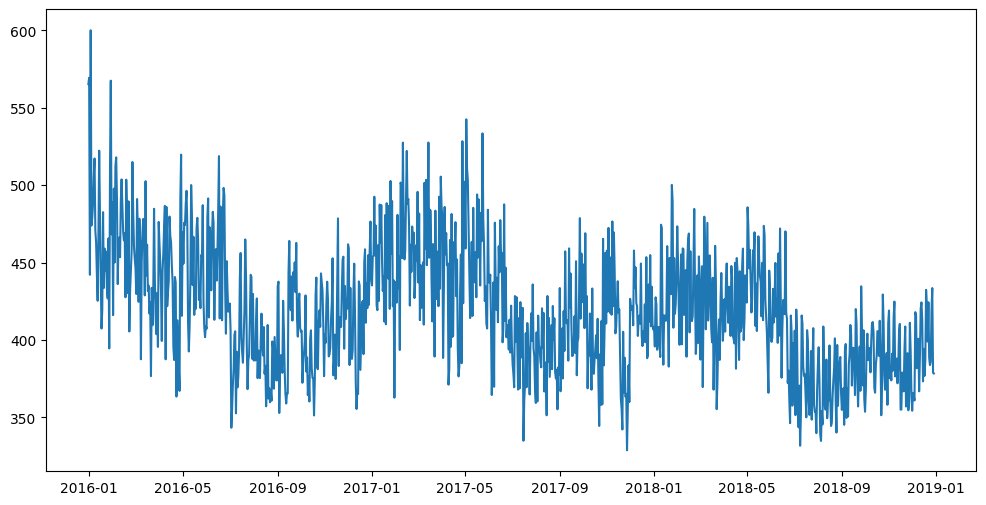

In [51]:
# Plotting time series for 'Date of Travel' with respect to 'Price Charged'
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='Date of Travel', y='Price Charged')
plt.title('Time Series of Price Charged over Date of Travel')
plt.xlabel('Date of Travel')
plt.ylabel('Price Charged')
plt.xticks(rotation=45)
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

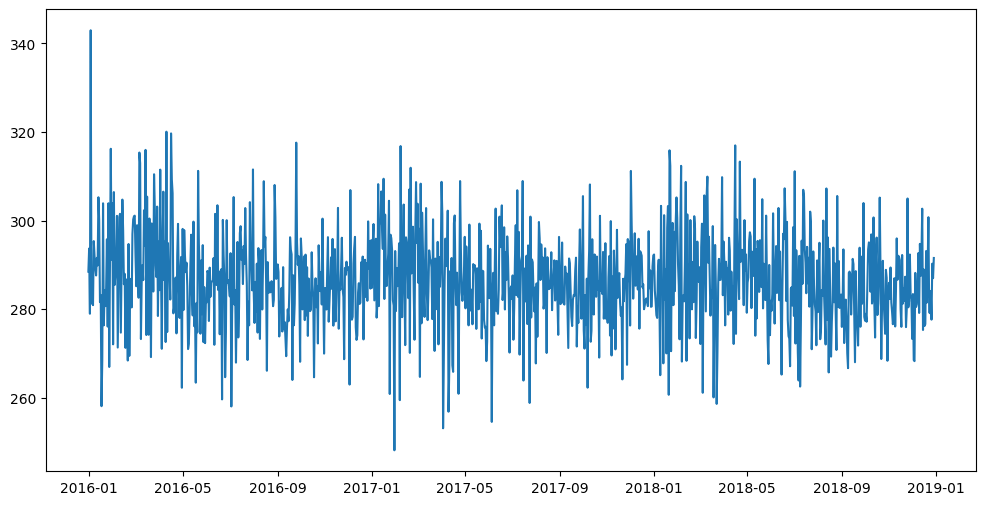

In [52]:
# Plotting time series for 'Date of Travel' with respect to 'Cost of Trip'
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='Date of Travel', y='Cost of Trip')
plt.title('Time Series of Price Charged over Date of Travel')
plt.xlabel('Date of Travel')
plt.ylabel('Cost of Trip')
plt.xticks(rotation=45)
plt.show()

## Hypothesis Investigation

<b> 1.  The average price charged per kilometer varies significantly between different cities. <b>

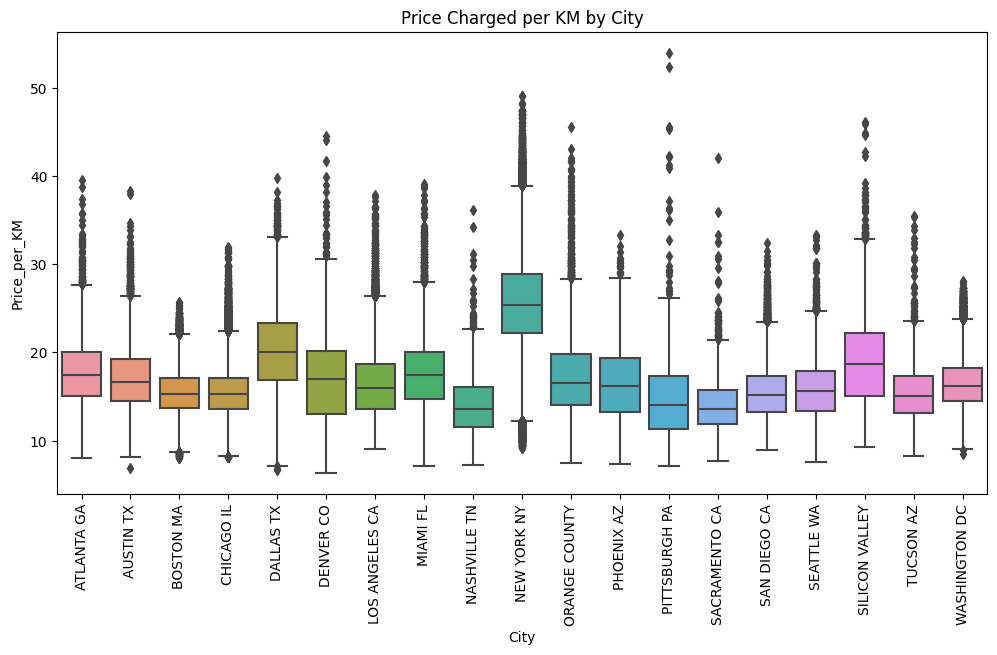

ANOVA test result: F=20284.23057278738, p=0.0


In [54]:
# Calculate price per KM
merged_data['Price_per_KM'] = merged_data['Price Charged'] / merged_data['KM Travelled']

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='City', y='Price_per_KM')
plt.title('Price Charged per KM by City')
plt.xticks(rotation=90)
plt.show()

# Group by City
city_groups = [group['Price_per_KM'].dropna() for name, group in merged_data.groupby('City')]

# ANOVA test
anova_result = f_oneway(*city_groups)
print(f'ANOVA test result: F={anova_result.statistic}, p={anova_result.pvalue}')

<b> The p-value of .00 is less than the alpha of .05.  There is a statistically significant difference in the average price charged per kilometer between different cities. <b>

<b> 2.  The price charged per kilometer is higher for one company compared to the other. <b>

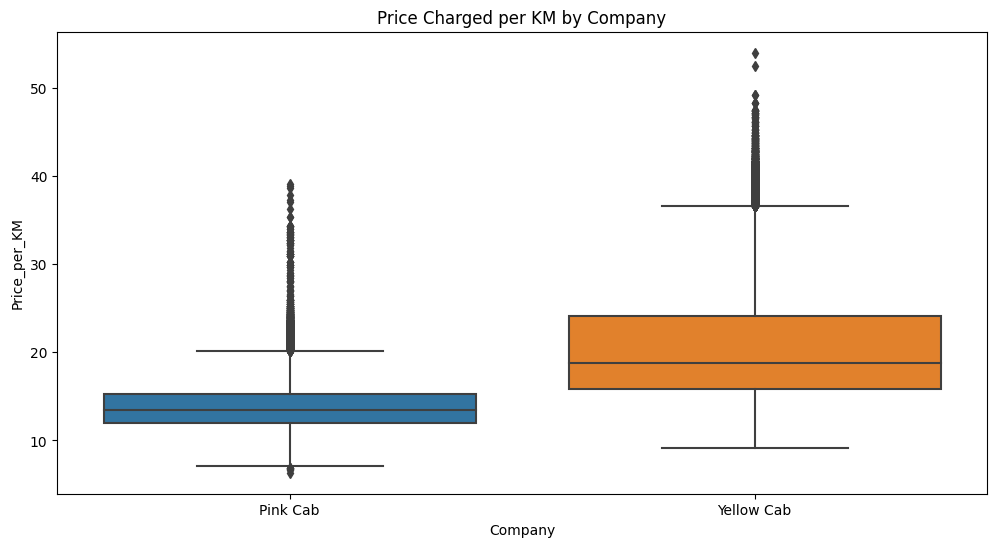

T-test result: t=-320.9807762543478, p=0.0


In [56]:
# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Company', y='Price_per_KM')
plt.title('Price Charged per KM by Company')
plt.show()

# Statistical Test
company_groups = [group['Price_per_KM'].dropna() for name, group in merged_data.groupby('Company')]

ttest_result = ttest_ind(*company_groups)
print(f'T-test result: t={ttest_result.statistic}, p={ttest_result.pvalue}')

<b> The p-value of .00 is less than the alpha of .05.  This indicates a statistically significant difference in the price charged per kilometer between the two companies. <b>

<b> 3.  Higher-income customers tend to travel longer distances. <b>

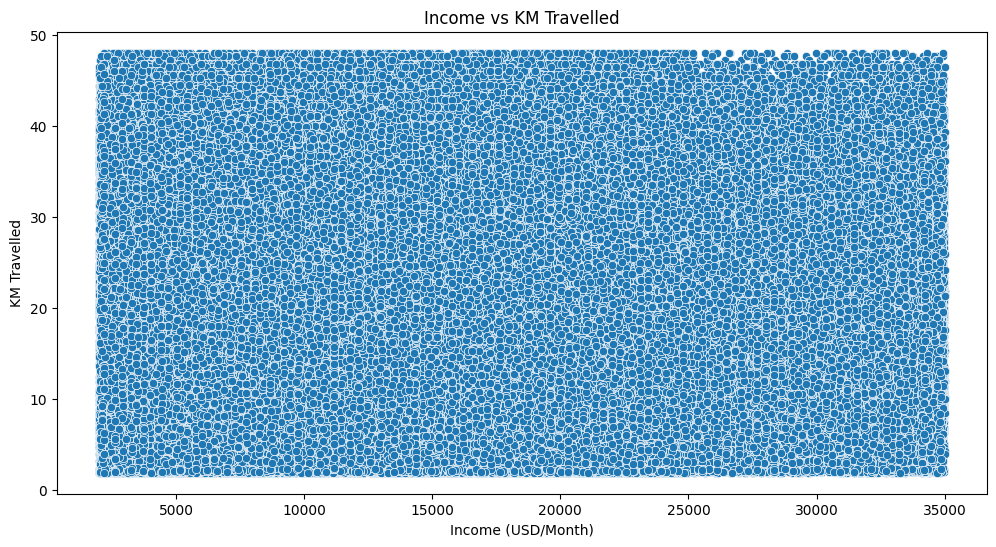

                    Income (USD/Month)  KM Travelled
Income (USD/Month)            1.000000     -0.000544
KM Travelled                 -0.000544      1.000000


In [57]:
# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='Income (USD/Month)', y='KM Travelled')
plt.title('Income vs KM Travelled')
plt.show()

# Correlation Test
correlation = merged_data[['Income (USD/Month)', 'KM Travelled']].corr()
print(correlation)

<b> There is not a linear relationship between the income of customers and the distance they travel. <b>

<B> 4.  The mode of payment varies significantly by city. <B>

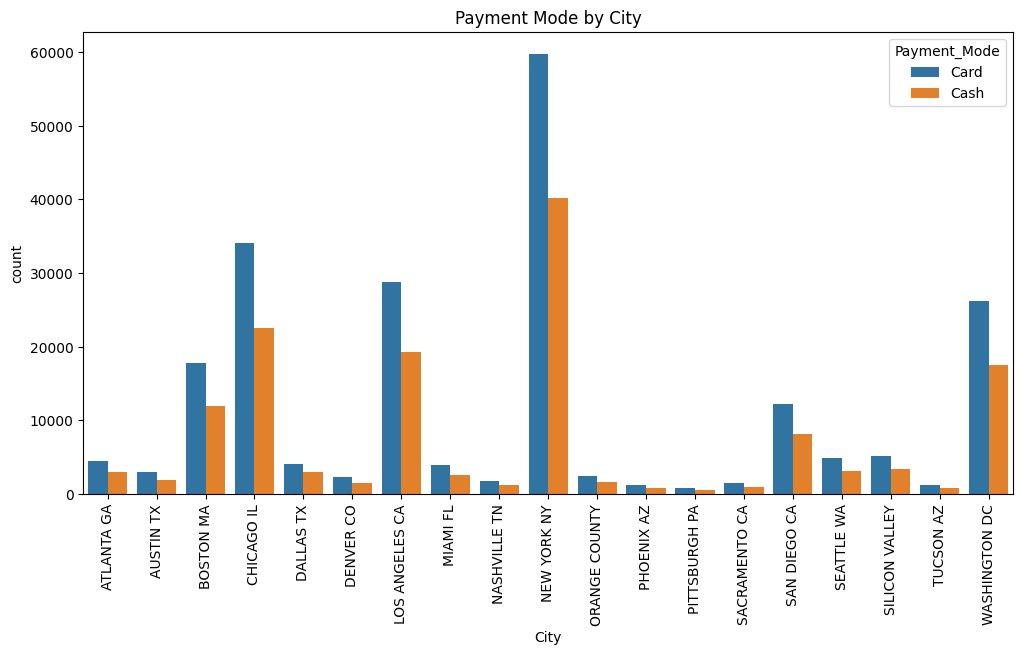

Chi-square test result: chi2=25.81043405002906, p=0.1041719654054217


In [59]:
# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='City', hue='Payment_Mode')
plt.title('Payment Mode by City')
plt.xticks(rotation=90)
plt.show()

payment_city_contingency = pd.crosstab(merged_data['City'], merged_data['Payment_Mode'])
chi2_result = chi2_contingency(payment_city_contingency)
print(f'Chi-square test result: chi2={chi2_result[0]}, p={chi2_result[1]}')

<b> The p-value is 0.104, which is greater than 0.05. This indicates that there is no statistically significant difference in the mode of payment across different cities. <b>

<b> 5.  There is a difference in the average cost of trips between the two companies. <b>

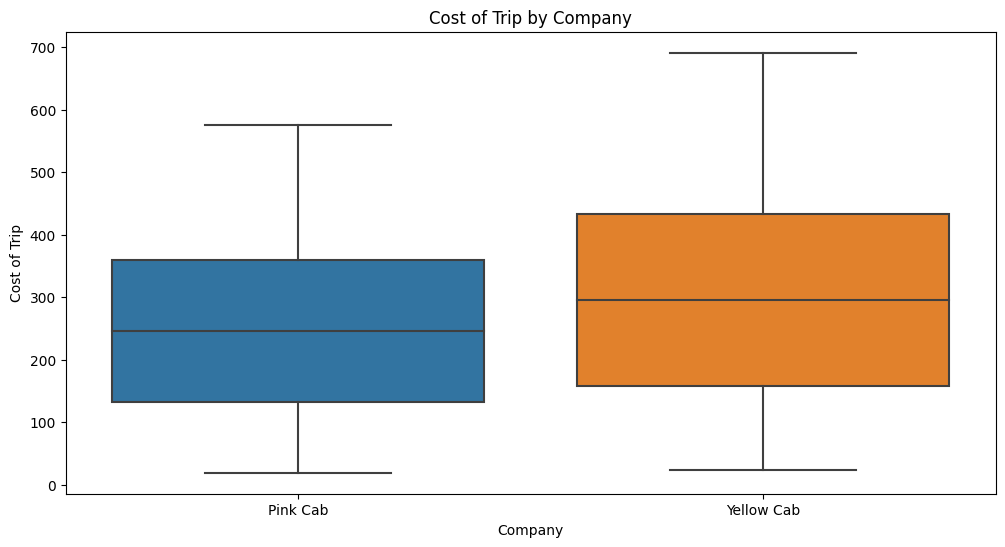

T-test result: t=-80.88610180101651, p=0.0


In [62]:
# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Company', y='Cost of Trip')
plt.title('Cost of Trip by Company')
plt.show()

company_cost_groups = [group['Cost of Trip'].dropna() for name, group in merged_data.groupby('Company')]
ttest_cost_result = ttest_ind(*company_cost_groups)
print(f'T-test result: t={ttest_cost_result.statistic}, p={ttest_cost_result.pvalue}')

<b> The p-value is 0.0, which is less than 0.05. This indicates a statistically significant difference in the average cost of trips between the two companies. <b>

<b> 6.  The gender of customers influences the distance traveled and price charged <b>

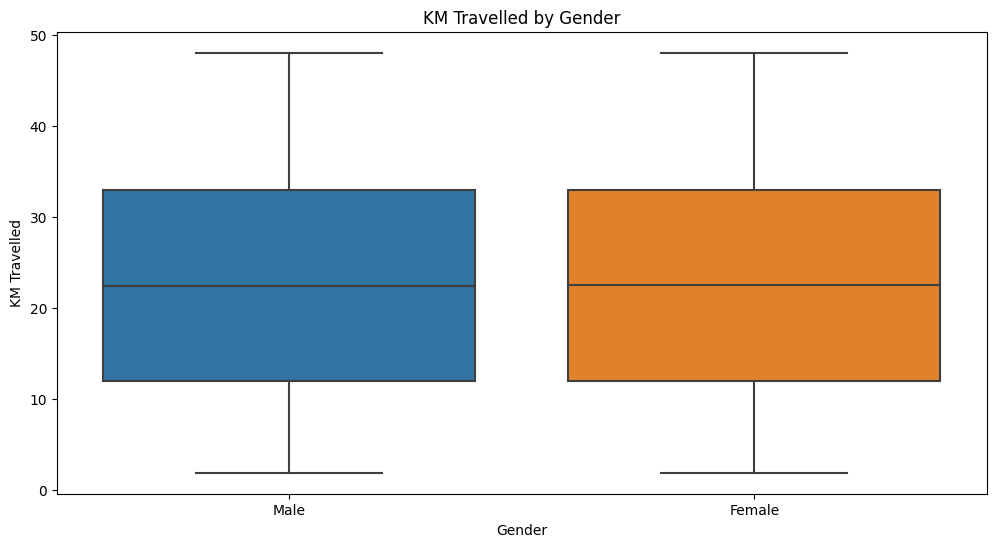

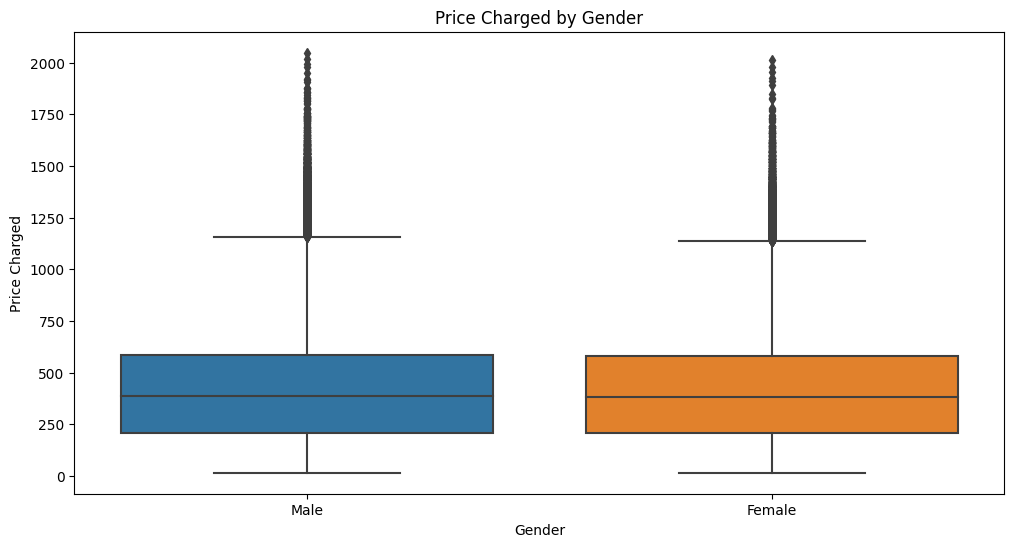

T-test result for KM Travelled: t=0.8095191786398974, p=0.4182171117082405
T-test result for Price Charged: t=-7.590702431313603, p=3.18936823617632e-14


In [66]:
# Plot for KM Travelled
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Gender', y='KM Travelled')
plt.title('KM Travelled by Gender')
plt.show()

# Plot for Price Charged
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Gender', y='Price Charged')
plt.title('Price Charged by Gender')
plt.show()

# T-tests
gender_km_groups = [group['KM Travelled'].dropna() for name, group in merged_data.groupby('Gender')]
gender_price_groups = [group['Price Charged'].dropna() for name, group in merged_data.groupby('Gender')]

ttest_gender_km_result = ttest_ind(*gender_km_groups)
ttest_gender_price_result = ttest_ind(*gender_price_groups)
print(f'T-test result for KM Travelled: t={ttest_gender_km_result.statistic}, p={ttest_gender_km_result.pvalue}')
print(f'T-test result for Price Charged: t={ttest_gender_price_result.statistic}, p={ttest_gender_price_result.pvalue}')

<b> T-test result for KM Travelled: t=0.8095191786398974, p=0.4182171117082405
The p-value is 0.418, which is greater than 0.05. This indicates no statistically significant difference in the distance traveled between genders. <b>
    
<b>T-test result for Price Charged: t=-7.590702431313603, p=3.18936823617632e-14
The p-value is very close to 0, which is less than 0.05. This indicates a statistically significant difference in the price charged between genders. <b>
    
    

<b> 7.  The Cost of Trip is seasonal. <b>

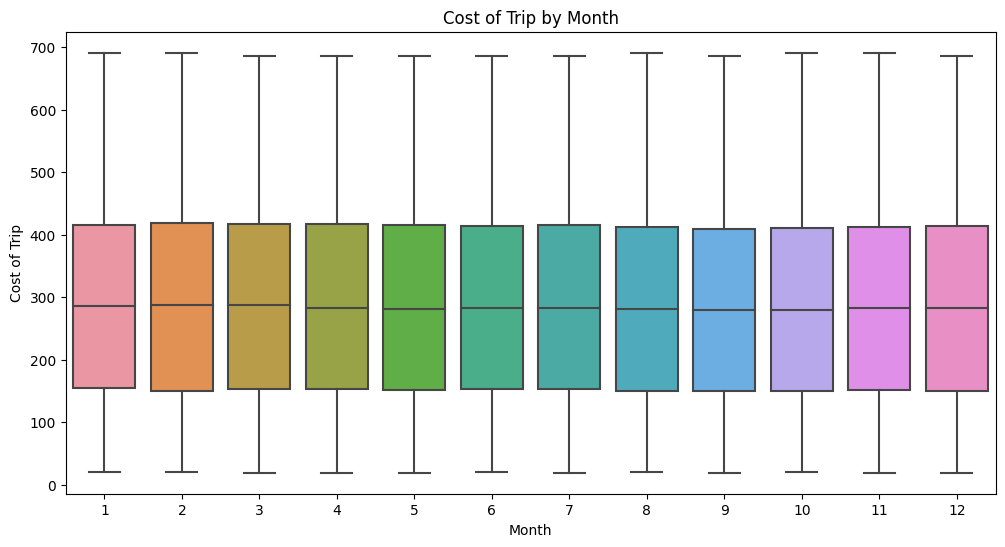

ANOVA test result: F=3.664021775443458, p=3.175407366980482e-05


In [65]:
# Extract month from 'Date of Travel'
merged_data['Month'] = merged_data[date_column_name].dt.month

# Ensure that the 'Cost of Trip' column is numeric
merged_data['Cost of Trip'] = pd.to_numeric(merged_data['Cost of Trip'], errors='coerce')

# Drop rows with missing or invalid data in the 'Cost of Trip' and 'Month' columns
merged_data = merged_data.dropna(subset=['Cost of Trip', 'Month'])

# Plotting the average cost of trip by month
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Month', y='Cost of Trip')
plt.title('Cost of Trip by Month')
plt.xlabel('Month')
plt.ylabel('Cost of Trip')
plt.show()

# Statistical Test: ANOVA
from scipy.stats import f_oneway

# Group by Month
month_groups = [group['Cost of Trip'].dropna() for name, group in merged_data.groupby('Month')]

# ANOVA test
anova_result = f_oneway(*month_groups)
print(f'ANOVA test result: F={anova_result.statistic}, p={anova_result.pvalue}')

<b> The p-value is very close to 0, which is less than 0.05. This indicates that there is a statistically significant seasonal variation in the cost of trips. <b>